**Exercice 1: Approximation de *e***
<br> $e = 1 + \textit{I}$ où $\textit{I} = \int_0^1e^udu = \mathbb{E}[g(U)]$ où $U$~$U[0,1]$ et $g(u) = e^u$ 
1. Nous avons LGN $\frac{1}{n}\sum_{k=1}^ng(U_k)\rightarrow^{p.s}_{n\rightarrow+\infty} I$ avec les $U_k$ iid ~ $U[0,1]$ 
<br> Mise en oeuvre:
<br> Réalise $(U_k)_{k\in\mathbb{N}}$ iid alors $\frac{1}{n}\sum_{k=1}^ng(U_k)$ est une approximation de I
2.$Var(g(U)) = \mathbb{E}(e^{2U}) - \mathbb{E}(e^U)^2 = -\frac{e^2}{2}+ 2e + \frac{1}{2} \approx 0.24$
3. Rq: cette méthode ne permet pas systematiquement une réduction de variance !!!!

In [9]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

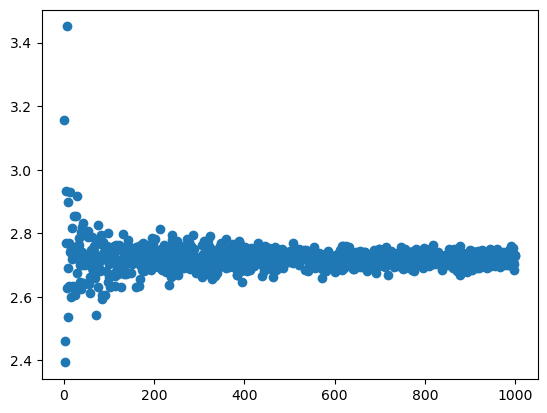

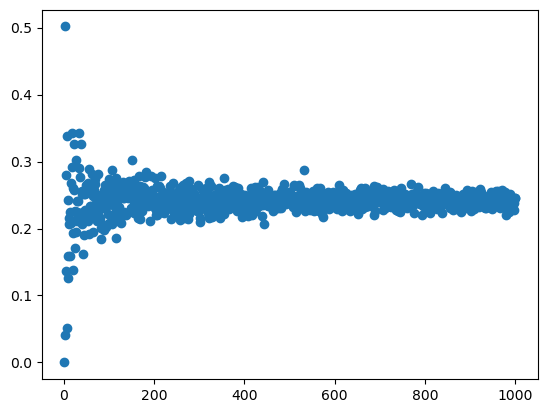

In [16]:
abcisse = np.arange(1,1001)
valeur = np.zeros(1000)
var = np.zeros(1000)
for i in (range(1,1001)):
    r = rnd.rand(i)
    valeur[i-1] = 1+sum(np.e**r)/i
    if i > 1: 
        var[i-1] = sum((1+np.e**r-valeur[i-1])**2)/(i-1)
plt.scatter(abcisse,valeur)
plt.show()
plt.figure()
plt.scatter(abcisse,var)
plt.show()
    

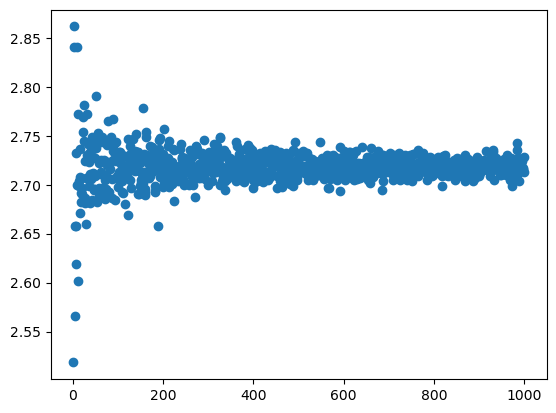

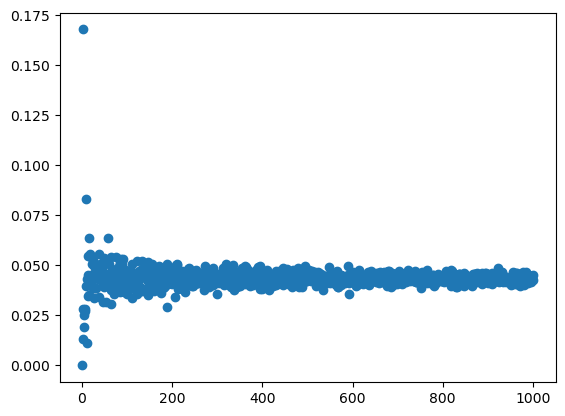

In [18]:
abcisse = np.arange(1,1001)
valeur = np.zeros(1000)
var = np.zeros(1000)
for i in (range(1,1001)):
    r = rnd.rand(i)
    valeur[i-1] = 5/2+sum(np.e**r - r - 1)/i
    if i > 1: 
        var[i-1] = sum((3/2-r+np.e**r-valeur[i-1])**2)/(i-1)
plt.scatter(abcisse,valeur)
plt.show()
plt.figure()
plt.scatter(abcisse,var)
plt.show()
    

3. On choisir $T: \mathbb{R} \rightarrow \mathbb{R}$ pas croisant et $X$ ~ $T(X)$ donc on a $g(X)$ et $g(T(X))$ antithétique. Donc, $Var(\frac{g(X)+g(T(X))}{2})\leq\frac{Var(g(X))}{2}$

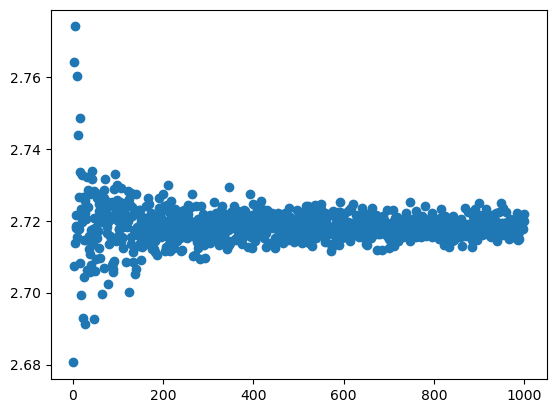

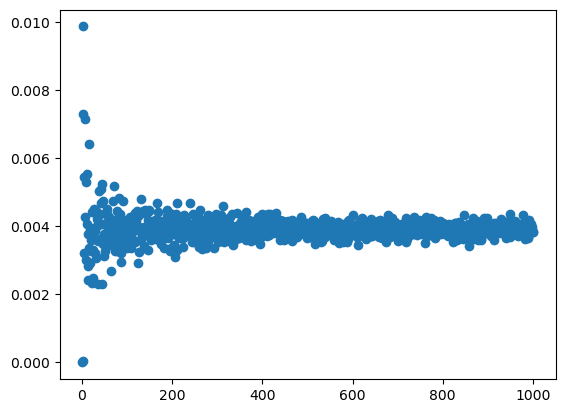

In [19]:
abcisse = np.arange(1,1001)
valeur = np.zeros(1000)
var = np.zeros(1000)
for i in (range(1,1001)):
    r = rnd.rand(i)
    valeur[i-1] = 1 + sum(np.e**r + np.e**(1-r))/(2*i)
    if i > 1: 
        var[i-1] = sum((1+(np.e**r+np.e**(1-r))/2-valeur[i-1])**2)/(i-1)
plt.scatter(abcisse,valeur)
plt.show()
plt.figure()
plt.scatter(abcisse,var)
plt.show()

**Exercie 2: un exemple d'application issu de la finance**
1. Simule G de distribution gaussien $(G_k)_{k\in\mathbb{N}}$. Si $G_k \geq 0$ donc on prend $g(G_k) = e^{G_k} - 1$ sinon $g(G_k) = 0$ et donc selons LGN:
<br> $\frac{1}{n}\sum_{k = 1}^{n}(g(G_k)) \rightarrow_{n\rightarrow\infty} C$

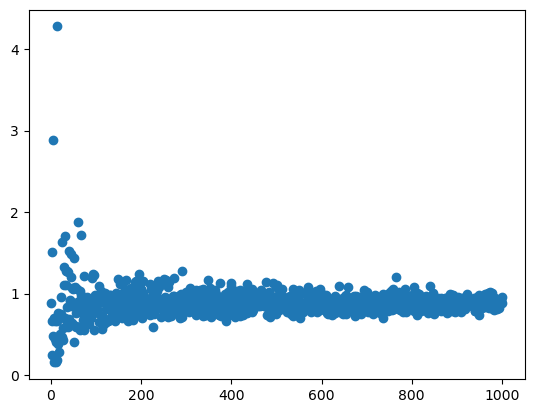

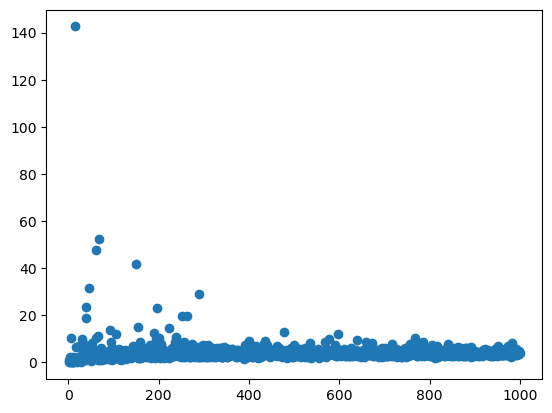

In [26]:
abcisse = np.arange(1,1001)
valeur = np.zeros(1000)
var = np.zeros(1000)
for i in (range(1,1001)):
    r = rnd.normal(loc = 0, scale = 1, size = i)
    valeur[i-1] = sum((np.e**r-1.)*(np.e**r-1.>0.))/i
    if i > 1: 
        var[i-1] = sum(((np.e**r-1.)*(np.e**r-1.>0.)-valeur[i-1])**2)/(i-1)
plt.scatter(abcisse,valeur)
plt.show()
plt.figure()
plt.scatter(abcisse,var)
plt.show()

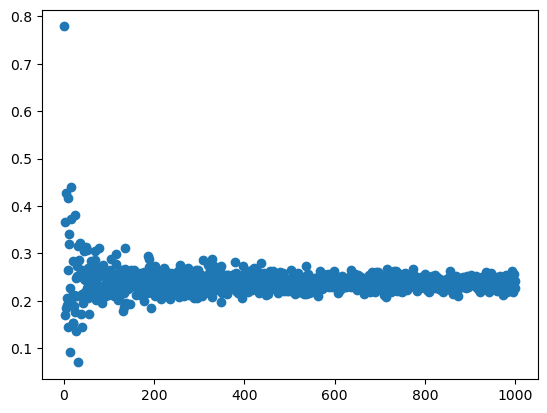

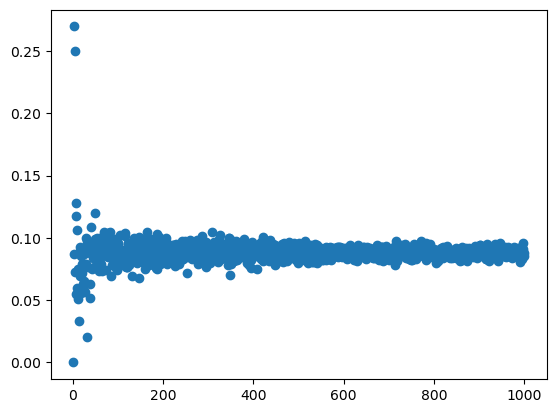

In [27]:
abcisse = np.arange(1,1001)
valeur = np.zeros(1000)
var = np.zeros(1000)
for i in (range(1,1001)):
    r = rnd.normal(loc = 0, scale = 1, size = i)
    valeur[i-1] = sum((1.-np.e**r)*(np.e**r-1.<0.))/i
    if i > 1: 
        var[i-1] = sum(((1.-np.e**r)*(np.e**r-1.<0.)-valeur[i-1])**2)/(i-1)
plt.scatter(abcisse,valeur)
plt.show()
plt.figure()
plt.scatter(abcisse,var)
plt.show()

4. Variable de controle $e^G -1$ parce que $Var(P)$ est significativement plus petite que $Var(C)$
5. $\varphi$  est monotone (decroissant) $f: x \rightarrow -x$ est decroissant donc $\varphi(-x)$ et $\varphi(x)$ antithétique si x ~$N(0,1)$ on a $x =_{\text{loi}}-x$
et on estimer P (par LGN) $\frac{1}{2n}\sum_{k=1}^{n}(\varphi(x)+\varphi(-x))$ ~ P